In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import gamma

sns.set_style('whitegrid')

## 3.d

In [3]:
from itertools import product

def maeEstimate(X, n, theta):
    return {
        '$\\delta_1$': np.abs(X/n - theta).mean(),
        '$\\delta_2$': np.abs(0.5 - theta).mean(),
        '$\\delta_3$': np.abs((X+12)/(n+24) - theta).mean(),
        '$\\delta_4$': np.abs((X+1)/(n+2) - theta).mean(),
        '$\\delta_5$': np.abs((X+np.sqrt(n)/2)/(n+np.sqrt(n)) - theta).mean(),
    }

sampleSize = 500000
ns = [5, 100]
thetas = np.linspace(0, 1, 150)

maes = []
for n, theta in product(ns, thetas):
    X = np.random.binomial(n=n, p=theta, size=sampleSize)
    mae = maeEstimate(X, n, theta)
    mae['theta'] = theta
    mae['n'] = n
    maes.append(mae)

In [4]:
df = pd.DataFrame(maes)

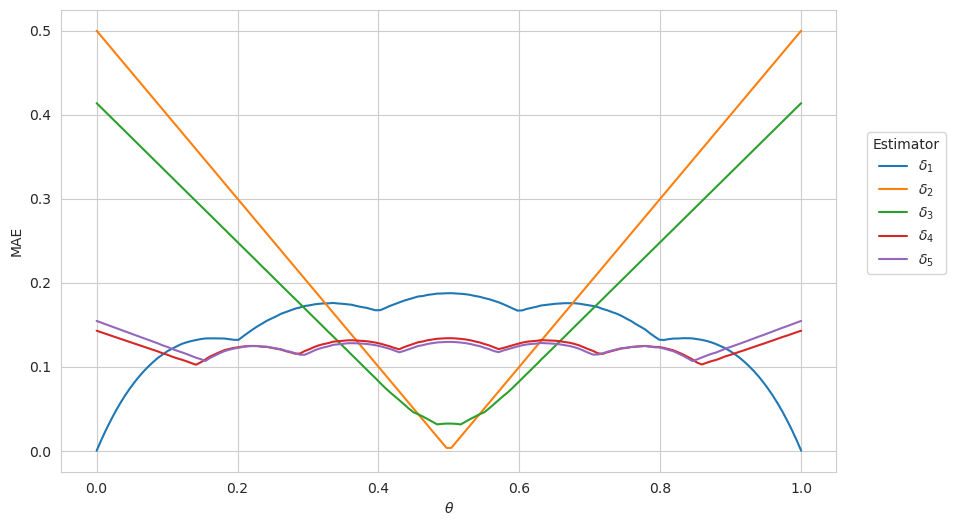

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

df[df.n==5].set_index('theta').drop(['n'], axis=1).plot(ax=ax)

ax.set_xlabel("$\\theta$")
ax.set_ylabel("MAE")
ax.legend(title='Estimator', loc='best', bbox_to_anchor=(1.15, 0.75))
# ax.set_ylim(-0.002, 0.012)
fig.show()

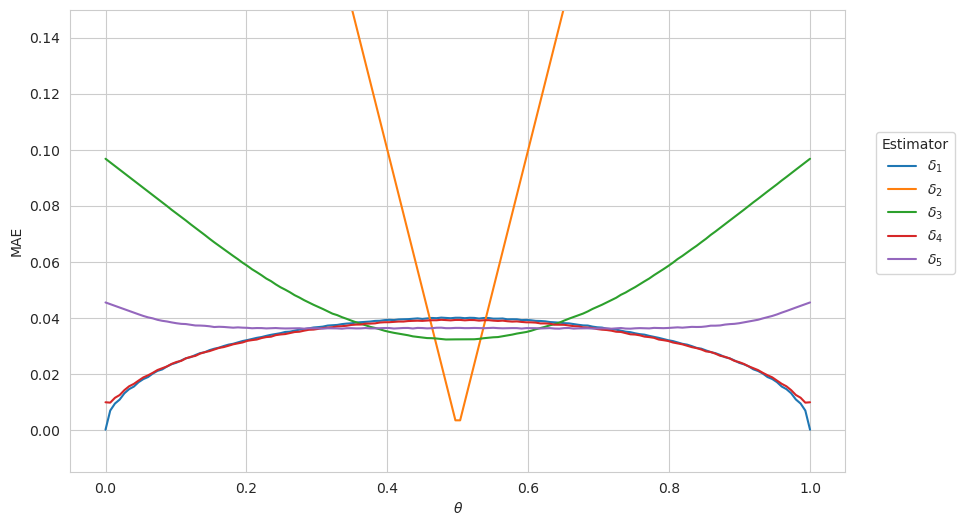

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

df[df.n==100].set_index('theta').drop(['n'], axis=1).plot(ax=ax)

ax.set_xlabel("$\\theta$")
ax.set_ylabel("MAE")
ax.legend(title='Estimator', loc='best', bbox_to_anchor=(1.15, 0.75))
ax.set_ylim(-0.015, 0.15)
fig.show()